In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from datetime import datetime as dt
import panel as pn
import requests
from bs4 import BeautifulSoup
from metpy.plots import StationPlot, USCOUNTIES
from metpy.units import units
import metpy.calc as mpcalc
import numpy as np

pn.extension()

In [2]:
#date input

year_1 = 2024
month_1 = 1
day_1 = 1 

date1 = dt(year_1, month_1, day_1)

year_start = date1.year
month_start = date1.month
day_start =date1.day

current = dt.now()

year_end = current.year
month_end = current.month
day_end = current.day

In [3]:
year_1 = 2024
month_1 = 1
day_1 = 1 

date1 = dt(year_1, month_1, day_1)

year_start_str = str(date1.year)
month_start_str = str(date1.month).zfill(2)
day_start_str =str(date1.day).zfill(2)

current = dt.now()

year_end_str = str(current.year)
month_end_str = str(current.month).zfill(2)
day_end_str = str(current.day).zfill(2)

In [4]:
#NYS MESONET LATEST 
df1 = pd.read_csv('http://www.atmos.albany.edu/products/nysm/nysm_latest.csv')

#ASOS NY LATEST
url = 'https://mesonet.agron.iastate.edu/ASOS/current.phtml?sortcol=max_tmpf&network=NY_ASOS&metar=no&sorder=desc&format=csv'
df2 = pd.read_csv(url).dropna()

#NYS ASOS ARCHIVE
url2 = (f'https://mesonet.agron.iastate.edu/cgi-bin/request/daily.py?network=NY_ASOS&stations=_ALL&year1={year_start}&month1={month_start}&day1={day_start}&year2={year_end}&month2={month_end}&day2={day_end}&na=blank&format=csv')
df3 = pd.read_csv(url2)

station_coords = {
    'JFK': {'lat': 40.6413, 'lon': -73.7781},
    'GTB': {'lat': 40.7912, 'lon': -73.8528},
    'JPX': {'lat': 40.7127, 'lon': -74.0073},
    'NYC': {'lat': 40.7128, 'lon': -74.0060},
    'OLE': {'lat': 40.8517, 'lon': -73.7640},
    'VGC': {'lat': 40.8294, 'lon': -73.4464},
    'JHW': {'lat': 42.1296, 'lon': -79.2404},
    'JRB': {'lat': 40.7432, 'lon': -74.0292},
    'SDC': {'lat': 40.6835, 'lon': -73.8892},
    'GVQ': {'lat': 40.8221, 'lon': -73.9223},
    'FOK': {'lat': 40.9641, 'lon': -72.6005},
    'BUF': {'lat': 42.9406, 'lon': -78.7322},
    'SYR': {'lat': 43.1115, 'lon': -76.1069},
    'ALB': {'lat': 42.7481, 'lon': -73.8020},
    'IAG': {'lat': 43.1071, 'lon': -78.9491},
    'ISP': {'lat': 40.7899, 'lon': -73.1008},
    'ITH': {'lat': 42.4915, 'lon': -76.4582},
    'OGS': {'lat': 43.9694, 'lon': -75.7213},
    'N03': {'lat': 42.2061, 'lon': -74.9097},
    'MGJ': {'lat': 41.5395, 'lon': -74.0786},
    'HWV': {'lat': 42.0389, 'lon': -73.8969},
    'POU': {'lat': 41.5085, 'lon': -73.8888},
    'SWF': {'lat': 41.5045, 'lon': -74.1046},
    'PEO': {'lat': 43.0721, 'lon': -75.3144},
    'DSV': {'lat': 42.0673, 'lon': -73.8557},
    'LGA': {'lat': 40.7769, 'lon': -73.8740},
    'HPN': {'lat': 41.1209, 'lon': -73.7070},
    '6B9': {'lat': 42.2813, 'lon': -73.8575},
    'PTD': {'lat': 41.1908, 'lon': -74.2621},
    'BGM': {'lat': 42.2080, 'lon': -75.9790},
    'FZY': {'lat': 42.0836, 'lon': -73.9615},
    'GFL': {'lat': 43.3572, 'lon': -73.6164},
    'ELM': {'lat': 42.1389, 'lon': -76.8906},
    'SLK': {'lat': 44.3391, 'lon': -74.0341},
    'FRG': {'lat': 40.7156, 'lon': -73.4331},
    'DKK': {'lat': 42.5471, 'lon': -73.8915},
    'PBG': {'lat': 44.6993, 'lon': -73.4674},
    'ROC': {'lat': 43.1263, 'lon': -77.6635},
    'ART': {'lat': 44.1501, 'lon': -75.9148},
    'MSS': {'lat': 44.9319, 'lon': -74.8640},
    'SCH': {'lat': 42.9136, 'lon': -73.9390},
    'OIC': {'lat': 43.0049, 'lon': -75.5147},
    'IUA': {'lat': 42.9371, 'lon': -74.5870},
    'RME': {'lat': 43.2216, 'lon': -75.4036},
    'ELZ': {'lat': 42.1069, 'lon': -77.2444},
}
coords_df = pd.DataFrame.from_dict(station_coords, orient='index').reset_index()
coords_df.columns = ['station', 'lat', 'lon']

# Merge the coordinates with your original dataframe
df2 = pd.merge(df2, coords_df, on='station', how='left')
df3 = pd.merge(df3,coords_df,on='station', how='left')

In [176]:
df1.columns

Index(['station', 'time', 'temp_2m [degC]', 'temp_9m [degC]',
       'relative_humidity [percent]', 'precip_incremental [mm]',
       'precip_local [mm]', 'precip_max_intensity [mm/min]',
       'avg_wind_speed_prop [m/s]', 'max_wind_speed_prop [m/s]',
       'wind_speed_stddev_prop [m/s]', 'wind_direction_prop [degrees]',
       'wind_direction_stddev_prop [degrees]', 'avg_wind_speed_sonic [m/s]',
       'max_wind_speed_sonic [m/s]', 'wind_speed_stddev_sonic [m/s]',
       'wind_direction_sonic [degrees]',
       'wind_direction_stddev_sonic [degrees]', 'solar_insolation [W/m^2]',
       'station_pressure [mbar]', 'snow_depth [cm]', 'frozen_soil_05cm [bit]',
       'frozen_soil_25cm [bit]', 'frozen_soil_50cm [bit]',
       'soil_temp_05cm [degC]', 'soil_temp_25cm [degC]',
       'soil_temp_50cm [degC]', 'soil_moisture_05cm [m^3/m^3]',
       'soil_moisture_25cm [m^3/m^3]', 'soil_moisture_50cm [m^3/m^3]', 'lat',
       'lon', 'elevation', 'name'],
      dtype='object')

In [190]:
wspd = df1['max_wind_speed_prop [m/s]'].values * units['m/s'].to('kts')
dir = df1['wind_direction_prop [degrees]'].values * units['degrees']
tempc = df1['temp_2m [degC]'].values*units['degC']
rh = df1['relative_humidity [percent]'].values

In [191]:
stid = df1['station']
lats = df1['lat'].values
lons = df1['lon'].values

In [192]:
temp = tempc.to('degF')
dpt = mpcalc.dewpoint_from_relative_humidity(tempc,rh)
dpt

/tmp/ipykernel_94491/1309168302.py:2: UserWarning: Relative humidity >120%, ensure proper units.
  dpt = mpcalc.dewpoint_from_relative_humidity(tempc,rh)


Magnitude,[94.73383834526362 96.09208243149374 91.81460487257016 97.27928382841935 95.3317813641122 100.05415804038768 93.28679312801648 97.6927019747497 96.39125158211732 107.34243975193317 90.86729110993969 100.38674347362598 93.30901067694037 103.85766681832945 94.85755382556806 89.73806988887713 92.66479684202659 95.16238506499161 92.62573241463167 93.05431095826498 97.87983682490949 89.65579593823549 85.55177004925974 96.71275104846745 90.05160884921679 94.94314060866657 87.82023114531563 89.71359700618075 93.61482154472918 92.63526318559099 94.73989497373736 98.67222879669112 93.90081220236186 96.87488195118311 92.28093317850016 95.06110322324105 95.06546891065568 92.0804564083677 92.49487899053332 90.23578161270473 95.6123612722995 92.0804564083677 86.88767528701294 99.26104612563427 89.00004232972304 100.58860579486526 93.63357063842739 86.53713288497698 88.21918640479936 92.44326935842844 98.53235415605303 92.35673762052102 89.87121127432869 96.13244710656528 94.95217997005943 92.6960393809768 88.53389717949051 94.93639581669197 86.1763351286724 90.92096248436394 98.92960405861356 95.41336294450633 95.39000617286695 92.28054738977801 87.88003833677112 88.79332502440559 106.4493647698215 91.45987129521563 92.02747889732393 96.0519749169394 94.47872475567681 86.38469858961105 86.25262980583398 93.16320545186295 92.79792069066991 95.01012675022355 88.84735452825214 93.21627008120231 97.29083108033984 95.56226501717913 97.98259378866601 95.98591353504798 95.56226501717913 85.73440891428976 87.80180796401322 107.62568738840207 91.52317382954948 88.76389595904709 95.54667029960808 93.95921366167886 95.81237530138606 95.2585336641331 86.07430439952242 94.17091667379384 87.90436916320971 94.57552676680797 87.53793317390415 96.76201119534954 95.45633926548686 100.94802357811449 104.09271191053836 88.42848763021561 94.77762799641437 106.3085463085149 92.0063938600079 107.43420540151641 101.22930000765484 95.59459384916698 88.16107044775504 98.34742889320444 87.98419321750862 94.9095942029619 88.71562847446563 95.03846553144876 94.13081856822475 108.8068991467029 92.12828086425475 98.51360987533036 96.71167973903897 94.27080625744475 94.30017240614455 92.10714778285205 88.21671322923117 92.21277066270409 86.98867607309501 96.74241037069396 95.23922242123444]
Units,degree_Celsius


In [126]:
lon_grid, lat_grid = np.meshgrid(lons, lats)

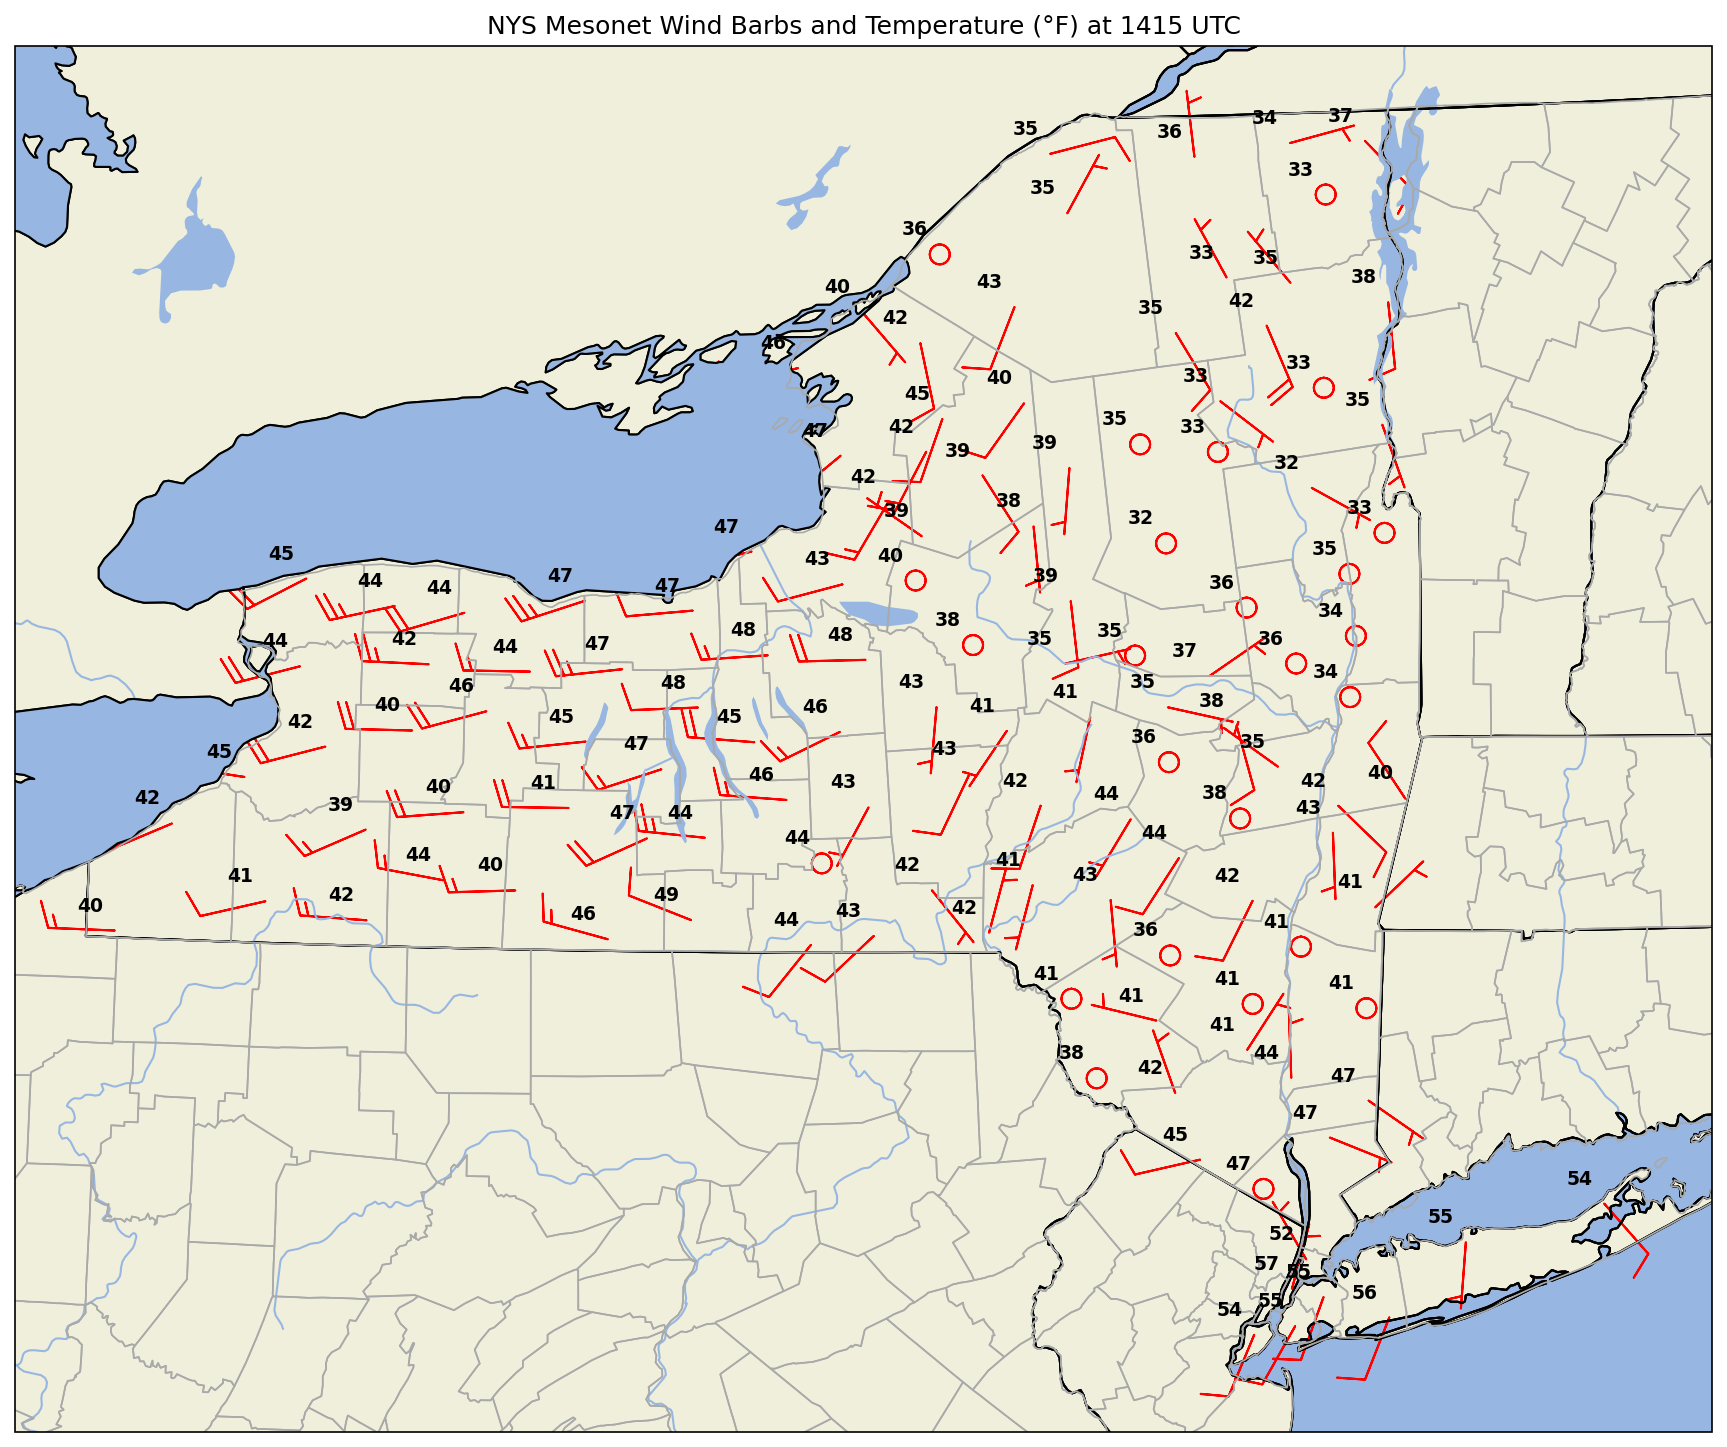

In [193]:
# Set the domain for defining the plot region.
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -72.0
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
res='10m'
fig = plt.figure(figsize=(18,12),dpi=150) # Increase the dots per inch from default 100 to make plot easier to read
ax = fig.add_subplot(1,1,1,projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature (cfeature.STATES.with_scale(res))
ax.add_feature (cfeature.RIVERS.with_scale(res))
ax.add_feature (cfeature.LAND.with_scale(res))
ax.add_feature (cfeature.COASTLINE.with_scale(res))
ax.add_feature (cfeature.LAKES.with_scale(res))
ax.add_feature (cfeature.STATES.with_scale(res))

stationplot = StationPlot(ax, lons, lats, clip_on=True,
                          transform=ccrs.PlateCarree(), fontsize=12)

stationplot.plot_parameter('NW', temp,weight='bold',fontsize=9)

ax.add_feature(USCOUNTIES.with_scale('5m'), linewidth=0.8, edgecolor='darkgray')
ax.barbs(lons,lats,u,v,color='r',transform=ccrs.PlateCarree(),length=8)
plt.title("NYS Mesonet Wind Barbs and Temperature (°F) at 1415 UTC")
plt.savefig("mesonettoday.png")
plt.show()

In [180]:
temp

Magnitude,[8.0 6.2 5.8 6.6 5.3 8.6 6.7 6.6 5.9 12.6 7.4 8.3 6.8 10.9 4.9 2.2 6.8 6.7 7.2 4.2 8.0 2.6 -0.0 6.0 2.3 8.3 4.3 2.3 5.1 3.8 5.2 7.2 4.6 6.0 4.0 5.3 5.2 3.4 5.7 2.4 6.2 3.4 1.0 9.3 3.4 8.7 5.8 0.4 1.5 4.0 8.0 4.4 2.4 6.7 5.3 4.6 1.7 5.0 0.3 2.8 8.8 6.0 5.7 5.4 1.4 2.1 13.8 6.7 3.6 6.3 5.0 0.4 0.3 4.1 5.8 8.3 1.8 4.1 8.5 5.6 6.8 8.6 5.6 0.1 1.4 12.8 5.0 1.6 5.3 5.0 6.7 6.9 0.3 7.4 1.3 5.5 1.1 7.2 6.1 8.3 12.2 1.6 4.9 12.0 4.5 12.6 8.6 5.5 1.9 7.9 1.6 8.3 1.7 5.2 4.9 13.2 4.2 7.1 9.0 4.8 4.7 3.6 1.4 3.5 0.8 8.2 7.9]
Units,degree_Celsius
